In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# 1 - РАЗВЕДОЧНЫЙ АНАЛИЗ

In [2]:
df = pd.read_excel('../data/join.xls', index_col=0)
df_original = df.copy(deep=True)
df

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
0,0,4.000000,57.000000,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,0,4.000000,60.000000,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,0,4.000000,70.000000,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,0,5.000000,47.000000,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,0,5.000000,57.000000,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
5,0,5.000000,60.000000,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
6,0,5.000000,70.000000,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
7,0,7.000000,47.000000,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000
8,0,7.000000,57.000000,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000


# Гистограмма всего датафрейма

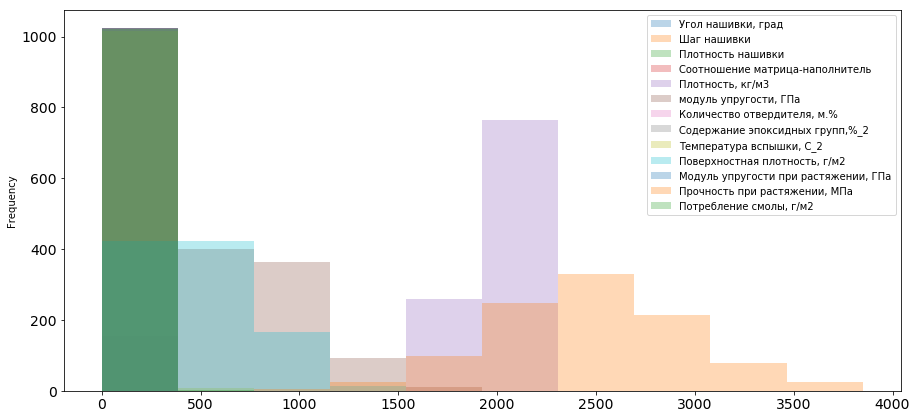

In [3]:
df.plot.hist(figsize=(15,7), alpha=0.3, fontsize=14)

# ГИСТОГРАММЫ КАЖДОГО ПАРАМЕТРА

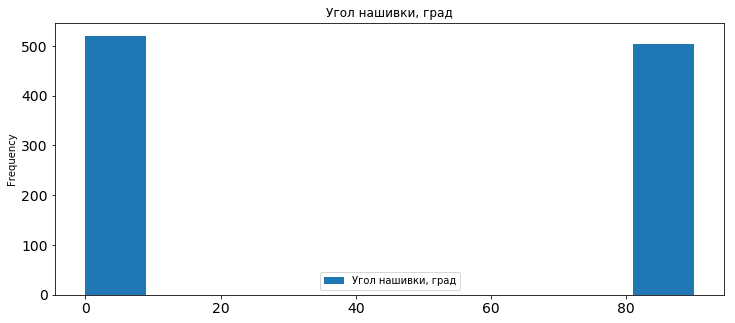

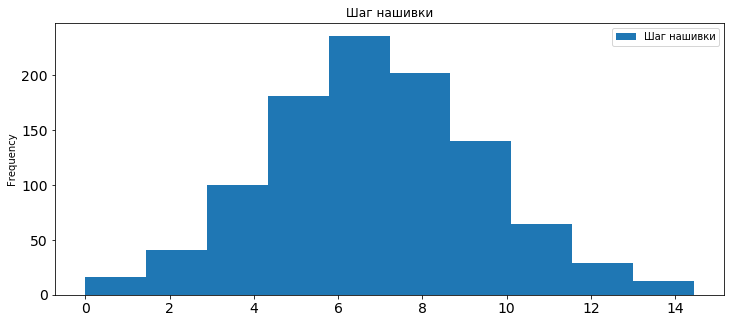

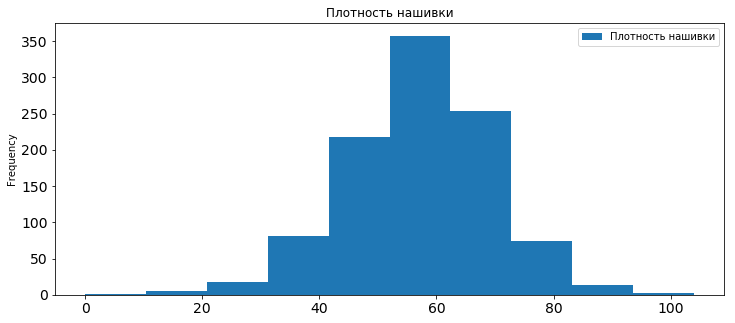

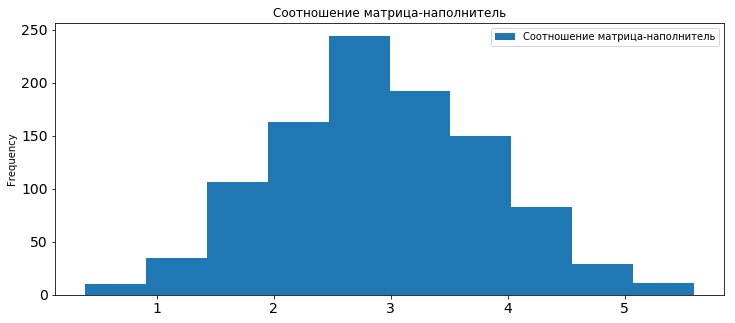

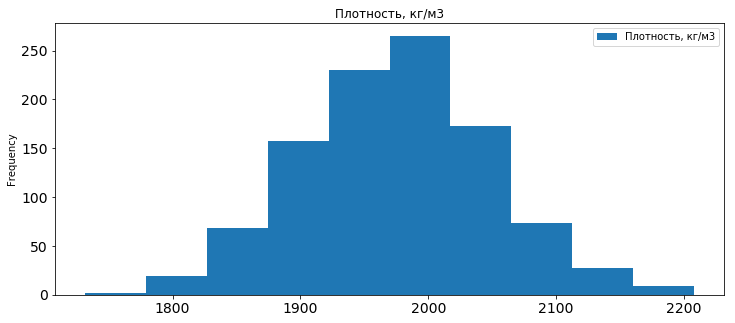

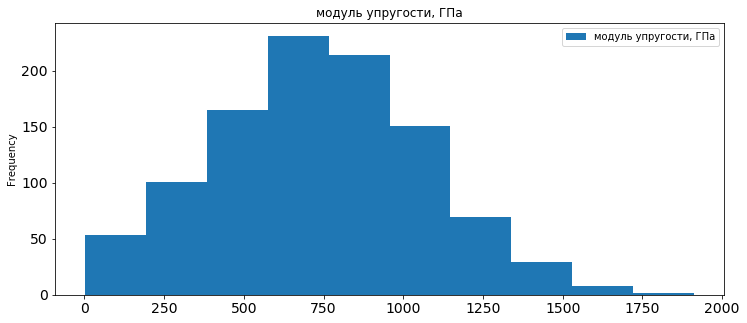

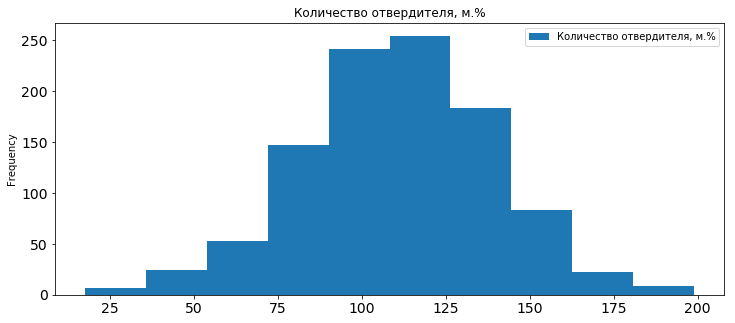

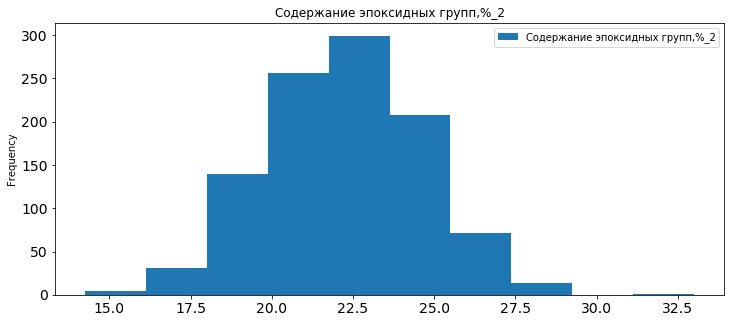

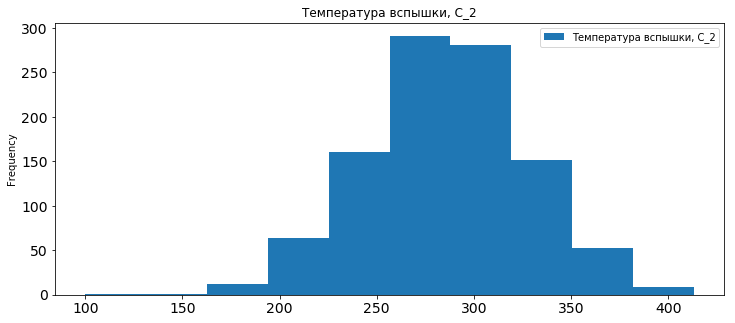

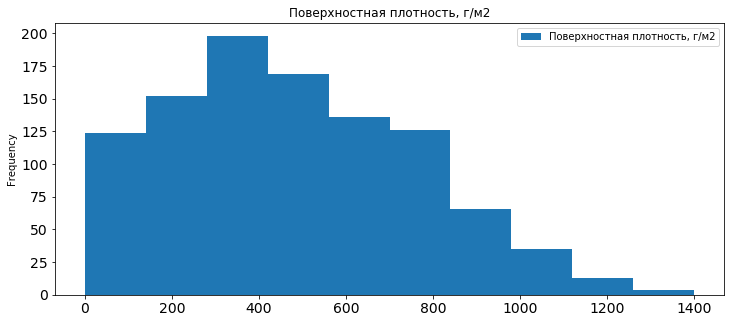

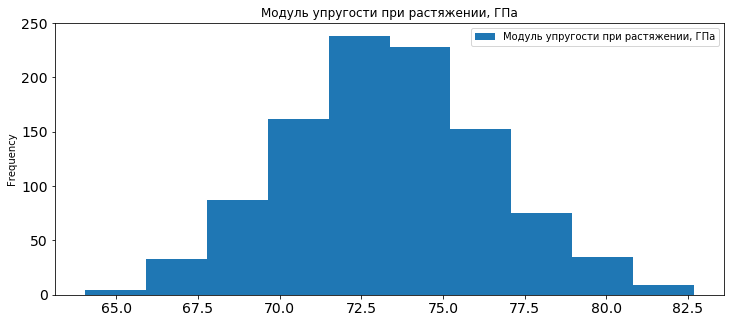

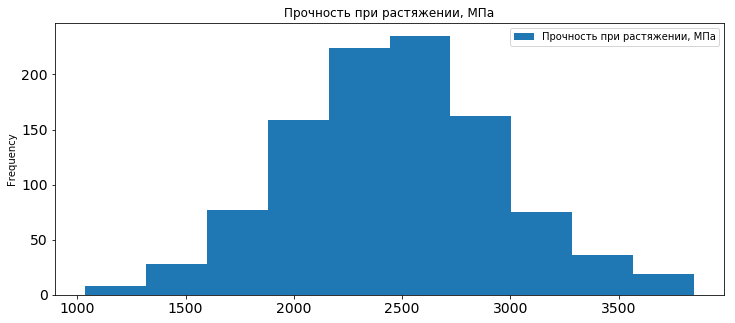

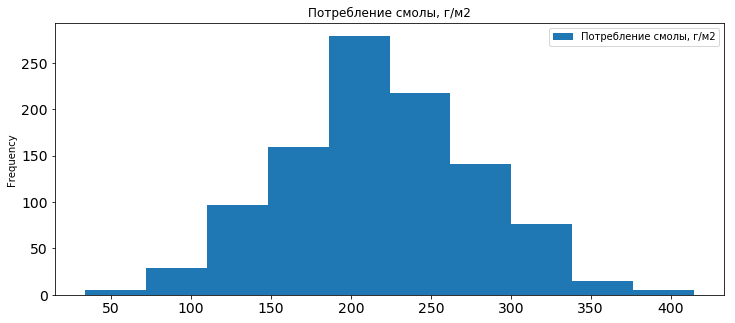

In [4]:
for column in df:
    temp_df = df[column].to_frame()
    temp_df.plot.hist(fontsize=14, title = column, figsize=(12,5))




# BOXPLOT

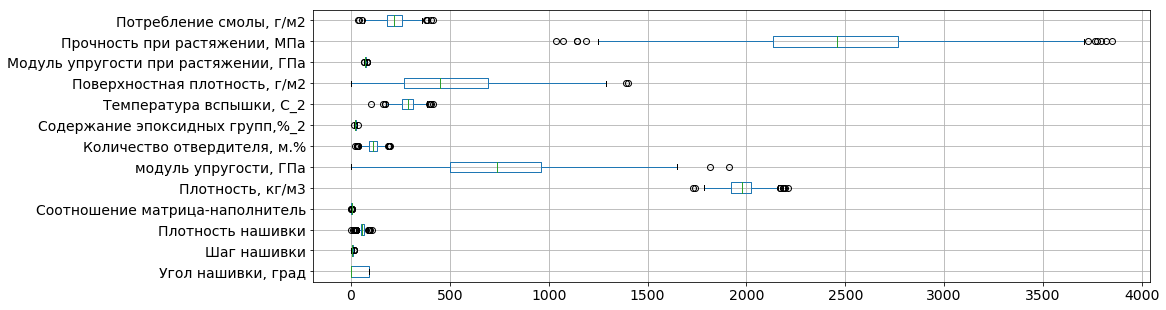

In [5]:
df.boxplot(vert=False, figsize=(15,5), fontsize=14)

# ПОПАРНЫЕ ГРАФИКИ РАССЕЯНИЯ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcc478b908>,
      dtype=object)

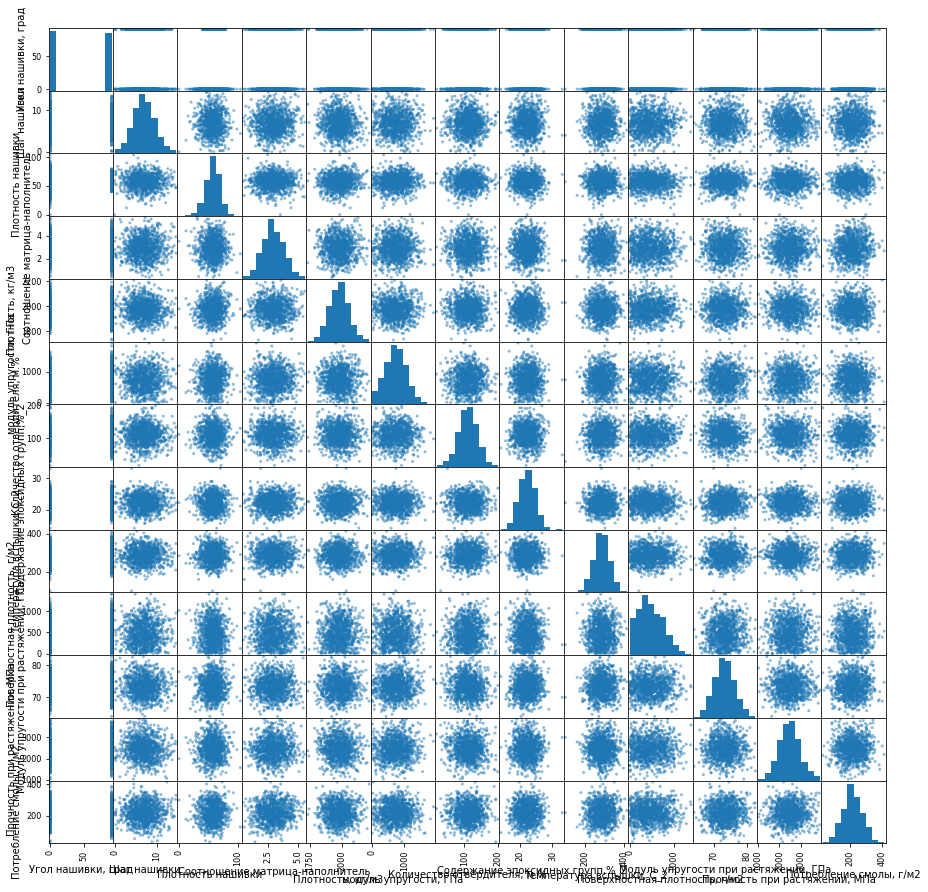

In [6]:
scatter_matrix(df, figsize=(15,15))

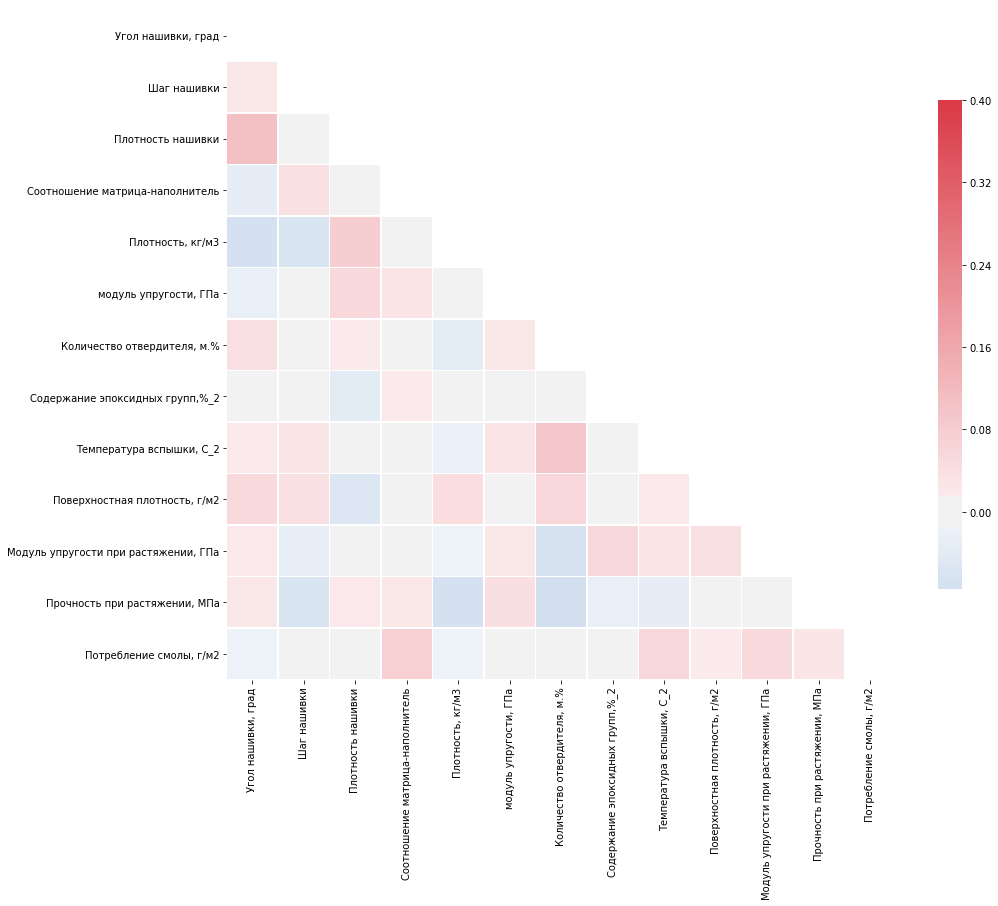

In [7]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=0.4, center=0,
square=True, linewidths=0.6, cbar_kws={'shrink':0.6})

# МЕДИАНА И СРЕДНЕЕ ПО КОЛОНКАМ


In [8]:

for column in df:
    temp_df = df[column]
    temp_mean = temp_df.mean()
    temp_median = temp_df.median()
    print(str(column) + ':')
    print('медиана = ' + str(temp_median) + ' среднее = ' + str(temp_mean))
    print()

df

Угол нашивки, град:
медиана = 0.0 среднее = 44.252199413489734

Шаг нашивки:
медиана = 6.9161438559491 среднее = 6.8992220776750175

Плотность нашивки:
медиана = 57.3419198469929 среднее = 57.153929432857645

Соотношение матрица-наполнитель:
медиана = 2.90687765033521 среднее = 2.9303657734325483

Плотность, кг/м3:
медиана = 1977.62165679058 среднее = 1975.7348881101545

модуль упругости, ГПа:
медиана = 739.664327697792 среднее = 739.9232327560721

Количество отвердителя, м.%:
медиана = 110.564839894065 среднее = 110.57076864736254

Содержание эпоксидных групп,%_2:
медиана = 22.2307437560244 среднее = 22.24438954776773

Температура вспышки, С_2:
медиана = 285.896812331237 среднее = 285.88215135162187

Поверхностная плотность, г/м2:
медиана = 451.86436518306 среднее = 482.73183303841853

Модуль упругости при растяжении, ГПа:
медиана = 73.2688045943481 среднее = 73.32857125009068

Прочность при растяжении, МПа:
медиана = 2459.52452600309 среднее = 2466.922842697902

Потребление смолы, г/

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
0,0,4.000000,57.000000,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,0,4.000000,60.000000,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,0,4.000000,70.000000,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,0,5.000000,47.000000,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,0,5.000000,57.000000,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
5,0,5.000000,60.000000,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
6,0,5.000000,70.000000,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
7,0,7.000000,47.000000,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000
8,0,7.000000,57.000000,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000


# 2 - ПРЕДОБРАБОТКА ДАННЫХ

In [9]:
#значения каких признаков практически повторяются
n_rows = len(df.index)
repeats = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/n_rows).iloc[0]

    if top_pct > 0.9:
        repeats.append(col)
        print(col)

repeats

#пусто до 0.6 значит малоинформативных признаков нет

for col in df.columns:
    q75, q25 = np.percentile(df.loc[:, col],[75, 25])
    intr_qr = q75 - q25

    min = q25 - (1.5 * intr_qr)
    max = q75 + (1.5 * intr_qr)

    df.loc[df[col] < min, col] = np.nan
    df.loc[df[col] > max, col] = np.nan

df.isnull().sum()
df = df.dropna(axis=0)
df

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
1,0.0,4.000000,60.000000,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,0.0,5.000000,47.000000,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,0.0,5.000000,57.000000,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
5,0.0,5.000000,60.000000,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
6,0.0,5.000000,70.000000,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
7,0.0,7.000000,47.000000,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000
8,0.0,7.000000,57.000000,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000
9,0.0,7.000000,60.000000,3.532338,2100.000000,1421.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000
10,0.0,7.000000,70.000000,2.919678,2160.000000,933.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000


# БОКСПЛОТЫ ПОСЛЕ:

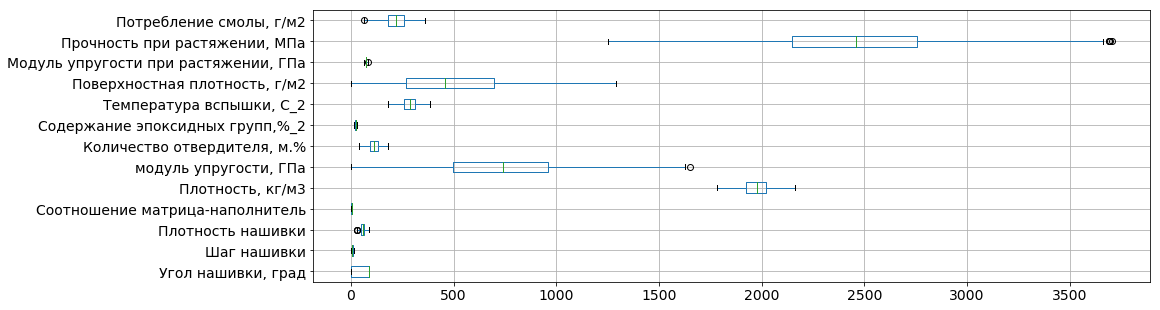

In [10]:
df.boxplot(vert=False, figsize=(15,5), fontsize=14)

# НОРМАЛИЗАЦИЯ 

In [11]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

df_normal = df.copy(deep=True)

df.describe()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.511752,0.502232,0.513776,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141
std,0.500129,0.183258,0.191342,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.372211,0.390482,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067
50%,1.000000,0.504258,0.516029,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766
75%,1.000000,0.624604,0.638842,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ПРОГНОЗ МОДУЛЯ УПРУГОСТИ

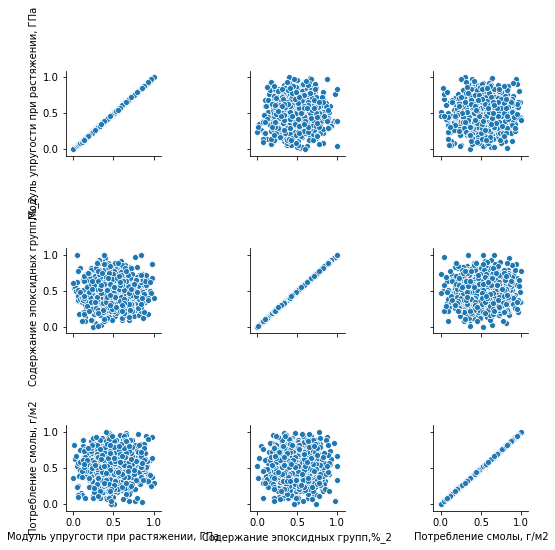

In [12]:
target = df['Модуль упругости при растяжении, ГПа']
train = df[['Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2']]

cols = ['Модуль упругости при растяжении, ГПа', 'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2']
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)


In [13]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size = 0.3)
Xtrn

,"Содержание эпоксидных групп,%_2","Потребление смолы, г/м2"
ИНДЕКС 1,,
665,0.682872,0.612640
943,0.593871,0.569018
885,0.443182,0.744429
908,0.658702,0.489875
912,0.572184,0.333670
916,0.408309,0.729492
386,0.336962,0.986139
813,0.530975,0.477912
217,0.662569,0.635392


In [14]:
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(Xtrn, Ytrn)
pred = lin_reg_mod.predict(Xtest)

test_set_rmse = (np.sqrt(mean_squared_error(Ytest, pred)))
test_set_r2 = r2_score(Ytest, pred)

print(test_set_rmse)
print(test_set_r2)

#нет линейной зависимости?

0.19343625398799394
-0.008240073860853458


In [15]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Xtrn)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, Ytrn)

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
X_p = poly_reg.fit_transform(Xtest)
pred = lin_reg2.predict(X_p)

test_set_rmse = np.sqrt(mean_squared_error(Ytest, pred))
test_set_r2 - r2_score(Ytest, pred)

print(test_set_rmse)
print(test_set_r2)

#никакой разницы

0.1939293159938327
-0.008240073860853458


In [17]:
pca = PCA(n_components=1)

XPCAreduced = pca.fit_transform(np.transpose(Xtrn))
XPCAreduced

array([[ 3.40642549],
       [-3.40642549]])

In [18]:
lin_reg_mod = LinearRegression()
Ytrn = np.array(Ytrn).reshape(-1, 1)

XPCAreduced
lin_reg_mod.fit(XPCAreduced, Ytrn)
pred = lin_reg_mod.predict(Xtest)

#размерность не совпадает 2 и 655

ValueError: Found input variables with inconsistent numbers of samples: [2, 655]

In [ ]:
slr = LinearRegression()

slr.fit(Xtrn, Ytrn)
y_train_pred = slr.predict(Xtrn)
y_test_pred = slr.predict(Xtest)

print('MSE TRAIN: {:.3f}, TEST: {:.3f}'.format(
    mean_squared_error(Ytrn, y_train_pred),
    mean_squared_error(Ytest, y_test_pred)))

print('R2 TRAIN: {:.3f}, TEST: {:.3f}'.format(
    r2_score(Ytrn, y_train_pred),
    r2_score(Ytest, y_test_pred)))


MSE TRAIN: 0.036, TEST: 0.037
R2 TRAIN: 0.010, TEST: -0.011


In [ ]:
#строим случайный лес
X = df_normal.copy()
y = df_normal.drop(['Прочность при растяжении, МПа'], axis=1)
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2, random_state=1)

r_f_t = RandomForestRegressor(random_state = 42)
params = {
    'n_estimators': [100,200,500],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [4,5,6],
    'criterion': ['squared_error'],
}

GSCV = GridSearchCV(estimator=r_f_t, param_grid=params, cv=5, verbose=2)
GSCV.fit(Xtrn, Ytrn)
GSCV.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.7s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END criterion=squared_error, max_depth=4, max_features=auto, n_estimators=200; total time=   0.5s
[CV] END cr

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [ ]:
rf = GSCV.best_estimator_
rf

RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [ ]:
rf = RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=500, random_state=42)
rf.fit(Xtrn, Ytrn)
rf.score(Xtest, Ytest)

#0.48651698126264525 гораздо лучше результат 

0.48651698126264525

In [ ]:
rf.predict(Xtest)

array([[0.09957078, 0.46207908, 0.38054498, ..., 0.27150128, 0.4038811 ,
        0.57752048],
       [0.05052327, 0.52034351, 0.31583344, ..., 0.26431942, 0.55892068,
        0.62540627],
       [0.93695404, 0.50478778, 0.51352578, ..., 0.52862346, 0.4517363 ,
        0.43595258],
       ...,
       [0.10862174, 0.44055581, 0.5544853 , ..., 0.24906802, 0.48961166,
        0.59786227],
       [0.92487943, 0.52095582, 0.52321208, ..., 0.45148637, 0.45097555,
        0.44625983],
       [0.11387464, 0.51511592, 0.48546688, ..., 0.31338195, 0.53537918,
        0.53415869]])

In [ ]:
np.mean((Ytest - np.mean(Ytest))*(Ytest - np.mean(Ytest)))


Угол нашивки, град                      0.249293
Шаг нашивки                             0.034059
Плотность нашивки                       0.036068
Соотношение матрица-наполнитель         0.033540
Плотность, кг/м3                        0.037137
модуль упругости, ГПа                   0.036727
Количество отвердителя, м.%             0.032820
Содержание эпоксидных групп,%_2         0.030792
Температура вспышки, С_2                0.032519
Поверхностная плотность, г/м2           0.044728
Модуль упругости при растяжении, ГПа    0.037141
Потребление смолы, г/м2                 0.035139
dtype: float64

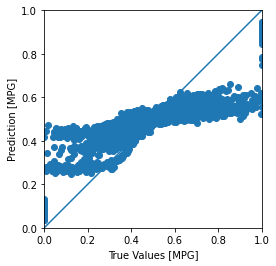

In [ ]:
prediction = rf.predict(Xtest)
a = plt.axes(aspect='equal')
plt.scatter(Ytest, prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Prediction [MPG]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
#какая-то зависимость наблюдается, это успех

# ПРОГНОЗ ПРОЧНОСТИ ПРИ РАСТЯЖЕНИИ

In [ ]:
target = df['Прочность при растяжении, МПа']
train = df.drop(['Прочность при растяжении, МПа'], axis=1)

Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

slr = LinearRegression()

slr.fit(Xtrn, Ytrn)
y_train_pred = slr.predict(Xtrn)
y_test_pred = slr.predict(Xtest)

print('MSE TRAIN: {:.3f}, TEST: {:.3f}'.format(
    mean_squared_error(Ytrn, y_train_pred),
    mean_squared_error(Ytest, y_test_pred)))

print('R2 TRAIN: {:.3f}, TEST: {:.3f}'.format(
    r2_score(Ytrn, y_train_pred),
    r2_score(Ytest, y_test_pred)))

#MSE очень неплох

MSE TRAIN: 0.035, TEST: 0.035
R2 TRAIN: 0.024, TEST: -0.012


In [ ]:
#пройдем по всем параметрам короче в цикле

for column in df:
    temp_df = df.copy(deep=True)

    target = temp_df[column]
    train = temp_df.drop([column], axis=1)

    Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

    slr = LinearRegression()

    slr.fit(Xtrn, Ytrn)
    y_train_pred = slr.predict(Xtrn)
    y_test_pred = slr.predict(Xtest)

    print('MSE TRAIN: {:.3f}, TEST: {:.3f}'.format(
        mean_squared_error(Ytrn, y_train_pred),
        mean_squared_error(Ytest, y_test_pred)))

    print('R2 TRAIN: {:.3f}, TEST: {:.3f}'.format(
        r2_score(Ytrn, y_train_pred),
        r2_score(Ytest, y_test_pred)))

    #MSE неплох

MSE TRAIN: 0.245, TEST: 0.251
R2 TRAIN: 0.018, TEST: -0.004
MSE TRAIN: 0.034, TEST: 0.033
R2 TRAIN: 0.017, TEST: -0.024
MSE TRAIN: 0.036, TEST: 0.036
R2 TRAIN: 0.038, TEST: -0.010
MSE TRAIN: 0.034, TEST: 0.037
R2 TRAIN: 0.025, TEST: -0.065
MSE TRAIN: 0.035, TEST: 0.033
R2 TRAIN: 0.044, TEST: -0.055
MSE TRAIN: 0.039, TEST: 0.041
R2 TRAIN: 0.021, TEST: -0.019
MSE TRAIN: 0.035, TEST: 0.036
R2 TRAIN: 0.028, TEST: -0.020
MSE TRAIN: 0.032, TEST: 0.033
R2 TRAIN: 0.010, TEST: -0.021
MSE TRAIN: 0.036, TEST: 0.036
R2 TRAIN: 0.020, TEST: -0.030
MSE TRAIN: 0.047, TEST: 0.045
R2 TRAIN: 0.019, TEST: -0.012
MSE TRAIN: 0.037, TEST: 0.035
R2 TRAIN: 0.021, TEST: -0.027
MSE TRAIN: 0.035, TEST: 0.037
R2 TRAIN: 0.014, TEST: 0.011
MSE TRAIN: 0.038, TEST: 0.038
R2 TRAIN: 0.016, TEST: -0.008


In [ ]:
model = RandomForestRegressor(n_estimators=2000, max_depth=18)
model.fit(Xtrn, Ytrn)
y_pred_forest = model.predict(Xtest)
r2_score(Ytest, y_pred_forest)

-0.06411532189175095

# НЕЙРОСЕТЬ МАТРИЦА-НАПОЛНИТЕЛЬ

In [ ]:
target = df['Соотношение матрица-наполнитель']
train = df.drop(['Соотношение матрица-наполнитель'], axis=1)

Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

clf = MLPRegressor(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(5, 5), random_state=1)
clf.fit(Xtrn, Ytrn)

res = clf.predict(Xtest)
r2_score(Ytest, res)

# матрица-наполнитель не подходит

-0.010824742322399938

In [ ]:
#пройдем по всем параметрам короче в цикле

for column in df:
    temp_df = df.copy(deep=True)

    target = temp_df[column]
    train = temp_df.drop([column], axis=1)

    Xtrn, Xtest, Ytrn, Ytest = train_test_split(train, target, test_size=0.3)

    clf = MLPRegressor(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(5, 5), random_state=1)
    clf.fit(Xtrn, Ytrn)

    res = clf.predict(Xtest)
    print(r2_score(Ytest, res))

    #нет результата

-0.0014956527755742854
-0.0002710313653451202
-0.0044273118650355325
-0.00408036142919066
-0.0020469379059224746
0.001169638622550928
-0.023480765489369393
-0.001590204816019014
-0.0013089734521831708
-0.002077332923764885
-0.004977654158533795
-0.009314809945436542
-0.005119340118642235
